# Exit Survey Analysis
In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
Stakeholders want to know the following:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

In [3]:
%%html
<b>Data Dictionary for DETE Survery:</b>
<table>
    <tr>
        <td>ID</td>
        <td>An id used to identify the participant of the survey</td>
    </tr>
    <tr>
        <td>SeparationType</td>
        <td>The reason why the person's employment ended</td>
    </tr>  
    <tr>
        <td>Cease Date</td>
        <td>The year or month the person's employment ended</td>
    </tr>  
    <tr>    
        <td>DETE Start Date</td>
        <td>The year the person began employment with the DETE</td>
    </tr>
</table>
<br></br>
<b>Data Dictionary for TAFE Survery:</b>
<table>
    <tr>
        <td>Record ID</td>
        <td>An id used to identify the participant of the survey</td>
    </tr>
    <tr>
        <td>Reason for ceasing employmen</td>
        <td>The reason why the person's employment ended</td>
    </tr>  
    <tr>
        <td>LengthofServiceOverall. Overall Length of Service at Institute (in years)</td>
        <td>The length of the person's employment (in years)</td>
    </tr>  
</table>

ID,An id used to identify the participant of the survey
SeparationType,The reason why the person's employment ended
Cease Date,The year or month the person's employment ended
DETE Start Date,The year the person began employment with the DETE
Record ID,An id used to identify the participant of the survey
Reason for ceasing employmen,The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years),The length of the person's employment (in years)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dete_survey = pd.read_csv('../data_sets/dete_survey.csv')
tafe_survey = pd.read_csv('../data_sets/tafe_survey.csv')

In [6]:
pd.options.display.max_columns = 150 # to avoid truncated output 
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [8]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

### Observations from the exploration work above:
1. dete_survey contains 'Not Stated' values that are missing values but are not represented by NaN.
2. Both dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
3. Many columns are named differently between the two dataframes even though those columns represent the same data.
4. Employee resignation due to dissatisfaction is indicated by multiple columns.

In [10]:
# Drop columns that are not needed for analysis
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66])

In [11]:
dete_survey_updated.isin(['Not Stated']).sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 0
Classification                           0
Region                                 105
Business Unit                            0
Employment Status                        0
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [12]:
# Replace 'Not Stated' with NaN
dete_survey_updated = dete_survey_updated.replace('Not Stated', np.nan)

We have dropped the columns that are not needed for the analysis and also replaced the 'Not Stated' values in dete_survey with NaN  

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [14]:
col_renaming_dict = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated.rename(columns=col_renaming_dict, inplace=True)


In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We have cleaned up the dete survey column names and renamed relevant tafe survey columns to match similar columns in dete survey. 
Now in the next steps let's analyze the what data we have in 'separationtype' column to see what are the various reasons.

In [17]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [18]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [19]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()

As per our goal for this analysis, we are only interested in resignations. So, in the steps above we have filtered the data to only include those rows where separationtype is 'Resignation'. dete_survey has three values that represent resignation and we have included all 3.   

Now let's check the data in 'cease_date' and 'dete_start_date' columns to make sure it looks reasonable.

In [20]:
dete_resignations['cease_date'].value_counts().sort_index()

cease_date
01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: count, dtype: int64

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(str).str.extract(r'(\d{4})').astype(float)

In [22]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index() 

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: count, dtype: int64

In [23]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: count, dtype: int64

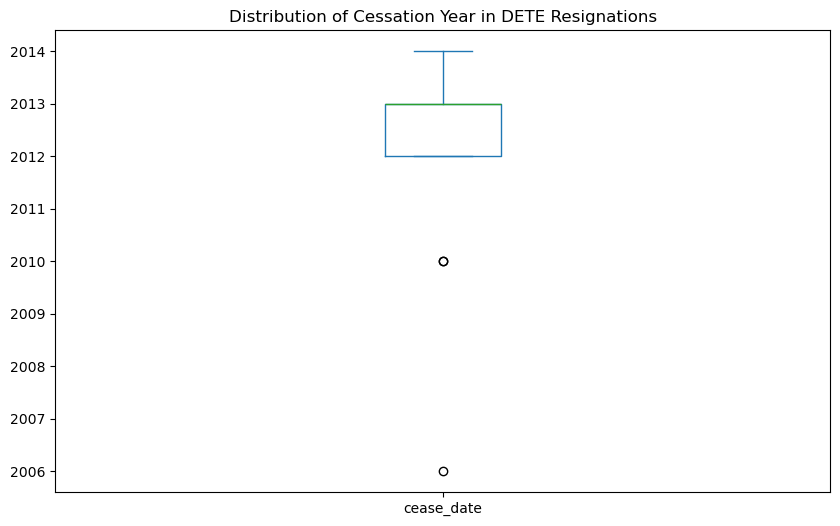

In [24]:
dete_resignations.plot(kind='box', y='cease_date', figsize=(10, 6), title='Distribution of Cessation Year in DETE Resignations')
plt.show()

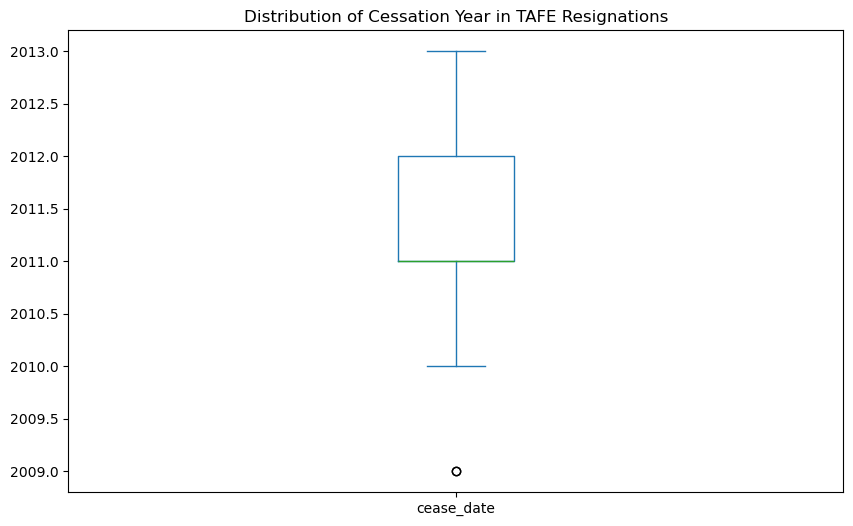

In [25]:
tafe_resignations.plot(kind='box', y='cease_date', figsize=(10, 6), title='Distribution of Cessation Year in TAFE Resignations')
plt.show()

We can see from the above plots that the cease_date ranges from 2006 - 2014. This looks like a reasonable range for the data. Although, there are some missing values for cease_date in both the datasets.    

For our analysis, we are interested in the years of service. We can calculate that by subtracting the dete_start_date from the cease_date. We already have this data for the tafe_resignations.

In [26]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

dete_start_date
1963     1
1971     1
1972     1
1973     1
1974     2
1975     1
1976     2
1977     1
1980     5
1982     1
1983     2
1984     1
1985     3
1986     3
1987     1
1988     4
1989     4
1990     5
1991     4
1992     6
1993     5
1994     6
1995     4
1996     6
1997     5
1998     6
1999     8
2000     9
2001     3
2002     6
2003     6
2004    14
2005    15
2006    13
2007    21
2008    22
2009    13
2010    17
2011    24
2012    21
2013    10
NaN     28
Name: count, dtype: int64

In [27]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date'].astype(float)

### Identify Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

tafe_survey_resignation:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction   

dete_survey_resignation:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [28]:
dete_dissatisfaction_reasons = ['job_dissatisfaction', 
                                'dissatisfaction_with_the_department', 
                                'physical_work_environment', 
                                'lack_of_recognition',
                                'lack_of_job_security',
                                'work_location',
                                'employment_conditions',
                                'work_life_balance',
                                'workload']
tafe_dissatisfaction_reasons = ['Contributing Factors. Dissatisfaction',
                                'Contributing Factors. Job Dissatisfaction',]


In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [31]:
d = {'Job Dissatisfaction': True,
     'Contributing Factors. Dissatisfaction': True,
     '-': False
}
tafe_resignations[tafe_dissatisfaction_reasons] = tafe_resignations[tafe_dissatisfaction_reasons].replace(d)
tafe_resignations[tafe_dissatisfaction_reasons]



,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
...,...,...
696,False,False
697,False,False
698,False,False
699,False,False


In [32]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
False    270
True      62
NaN        8
Name: count, dtype: int64

In [33]:
def dissatisfaction(row):
    if row.any():
        return True
    if row.isna().all():
        return np.nan
    else:
        return False
tafe_resignations['dissatisfaction'] = tafe_resignations[tafe_dissatisfaction_reasons].apply(dissatisfaction, axis=1)
tafe_resignations.loc[tafe_resignations['dissatisfaction']==True, tafe_dissatisfaction_reasons+['dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfaction
14,Contributing Factors. Dissatisfaction,True,True
17,False,True,True
20,Contributing Factors. Dissatisfaction,True,True
26,Contributing Factors. Dissatisfaction,True,True
40,Contributing Factors. Dissatisfaction,False,True
...,...,...,...
661,False,True,True
671,False,True,True
675,Contributing Factors. Dissatisfaction,True,True
685,Contributing Factors. Dissatisfaction,True,True


In [34]:
tafe_resignations['dissatisfaction'].value_counts(dropna=False)

dissatisfaction
False    241
True      91
NaN        8
Name: count, dtype: int64

In [35]:
dete_resignations['dissatisfaction'] = dete_resignations[dete_dissatisfaction_reasons].apply(dissatisfaction, axis=1)
dete_resignations['dissatisfaction'].value_counts(dropna=False)

dissatisfaction
False    162
True     149
Name: count, dtype: int64

We updated 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values. We used the following criteria:
- If value is 'Job Dissatisfaction' or 'Contributing Factors. Dissatisfaction' replace with True
- If value is '-' replace with False
- Leave the NaN as NaN   

We have created a 'dissatisfaction' column in both dataframes using the following criteria:
- If any columns in dete_dissatisfaction_reasons or tafe_dissatisfaction_reasons is True, return True
- If all values in dete_dissatisfaction_reasons or tafe_dissatisfaction_reasons are NaN, return np.nan
- Else, return False
   
Next, let's combine the data from the two dataframes keeping in mind that we need to aggregate data according to institute_service column.

In [36]:
# adding a new column to allow us to distinguish between the two datasets
dete_resignations['source'] = 'dete'
tafe_resignations['source'] = 'tafe'

In [37]:
combined_resignations = pd.concat([dete_resignations, tafe_resignations], ignore_index=True, sort=False)

In [38]:
combined_resignations.notna().sum()

id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [39]:
# drop columns that have less than 500 non-null values
combined_resignations = combined_resignations.dropna(thresh=500, axis=1)

We now have a combined dataset. We still had some columns left in the dataframe that we don't need to complete our analysis. So, we dropped columns with less than 500 non null values.   

Now let's look at the institute_service column and clean up if needed.

In [40]:
combined_resignations['institute_service'].value_counts(dropna=False)

institute_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0   

In [41]:
# Extracting the years from the institute_service column
combined_resignations['institute_service'] = combined_resignations['institute_service'].astype(str).str.extract(r'(\d+)').astype(float) 

In [42]:
# define bins for institute_service
bins = [0, 2, 6, 10, np.inf]
labels = ['New: Less than 3 years', 'Experienced: 3-6 years', 'Established: 7-10 years', 'Veteran: 11 or more years']
combined_resignations['service_cat'] = pd.cut(combined_resignations['institute_service'], bins=bins, labels=labels)


We have cleaned up the institute_service column data and created a category column based on the following bins:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company    

Now, let's create a pivot table for service_cat and dissatisfaction.

In [43]:
combined_resignations['dissatisfaction'].value_counts(dropna=False)

dissatisfaction
False    403
True     240
NaN        8
Name: count, dtype: int64

In [44]:
combined_resignations['service_cat'].value_counts(dropna=False)

service_cat
New: Less than 3 years       173
Experienced: 3-6 years       172
Veteran: 11 or more years    136
NaN                          108
Established: 7-10 years       62
Name: count, dtype: int64

In [45]:
combined_resignations[['dissatisfaction','service_cat']].isna().any(axis=1).sum()

108

In [52]:
table = pd.pivot_table(combined_resignations,
                       index='service_cat',
                        values='dissatisfaction',
                        aggfunc='mean', # using 'mean' to calculate the average dissatisfaction rate
                        margins=False,
                        observed=True)
table

,dissatisfaction
service_cat,
New: Less than 3 years,0.265896
Experienced: 3-6 years,0.343023
Established: 7-10 years,0.516129
Veteran: 11 or more years,0.485294


<Figure size 1000x600 with 0 Axes>

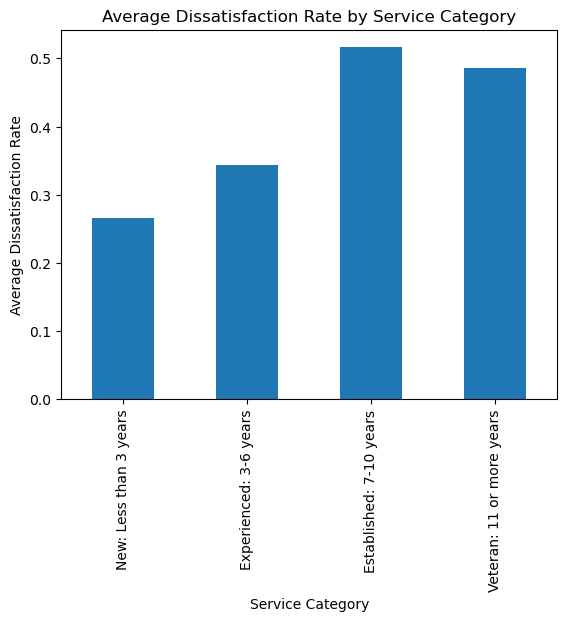

In [54]:
# Plotting the dissatisfaction rates by service category
%matplotlib inline
plt.figure(figsize=(10, 6))
table.plot(kind='bar', legend=False)
plt.title('Average Dissatisfaction Rate by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Average Dissatisfaction Rate')
plt.show()

## Conclusion
Based on the analysis, it appears that the dissatisfaction rates vary across different service categories. The average dissatisfaction rate is highest among those with more than 7 years of service, indicating that long-term employees may be more likely to leave due to dissatisfaction. In contrast, those with 3 or less years of service show a significantly lower dissatisfaction rate, suggesting that newer employees are generally more satisfied with their roles.


### Author
Puneet Pawar